# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [167]:

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [169]:
path="/content/drive/MyDrive/Austin Texas/Classification/project/"
Loan=pd.read_csv(path+"Loan_Modelling.csv")
backup=Loan.copy()

## Data Overview

* Observations
* Sanity checks

####View the first and last 5 rows of the dataset.

In [170]:
Loan.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [171]:
Loan.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


####Understand the shape of the dataset

In [172]:
Loan.shape

(5000, 14)

* Dataset has 5000 rows and 14 columns

####Check the data types of the columns for the dataset.

In [173]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The dataset has 14 columns.<br>
Data types:
- Integer: 13 columns.
- Float (decimal): 1 column (CCAvg).

####Checking missing values

In [174]:
Loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

The dataset do not have missing values.

####Checking the statistical summary of the data

In [175]:
Loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- **Age**: minimum: 23 years, average:45.3 years, Max:67 years,Mean:45.  
- **Experience**: minimum:-3, average:20.1, Max 43 years, Mean:30 years. it has negative values that should be a error in the data.
- **Income**: minimum: 8k dollars , average:73.77k dollars., Max:224K dollars,Mean:64k dollars.This feature seems to be right skewed.
- **Mortgage**: minimum:0, average: 56.4k dollars, Max:635K dollars,Mean:0. At least 50% of the data has no mortgage.  
- **CD_Account**: Less than 25% has a Certificate of deposit.  
- Securities Account:  Less than 25% has a Certificate of deposit.


#### Fixing Negative values

In [176]:
# Correcting the experience values
Loan["Experience"].replace(-1, 1, inplace=True)
Loan["Experience"].replace(-2, 2, inplace=True)
Loan["Experience"].replace(-3, 3, inplace=True)

#### Feature Engineering

In [177]:
# checking the number of uniques in the zip code
Loan["ZIPCode"].nunique()

467

- Let's use the first 2 digits of the zip code that  represents a region.

---



In [178]:
Loan["ZIPCode"] = Loan["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    Loan["ZIPCode"].str[0:2].nunique(),
)
Loan["ZIPCode"] = Loan["ZIPCode"].str[0:2]

Loan["ZIPCode"] = Loan["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Creating functions to plot the analysis

In [200]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [201]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [202]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [203]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate

1. Age

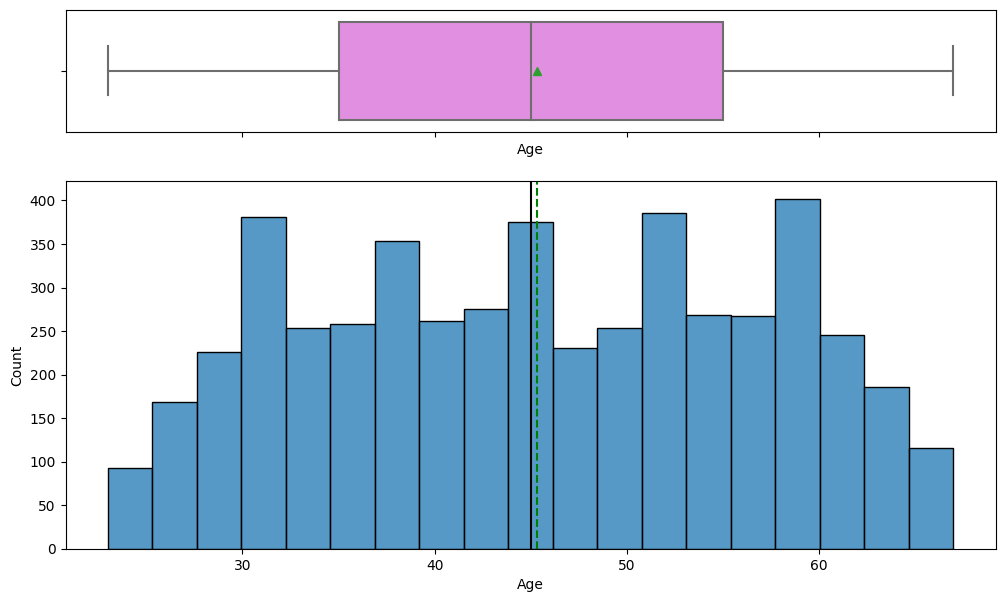

In [204]:
histogram_boxplot(Loan, "Age")

Age seems to have a uniform distribution.

2. Experience

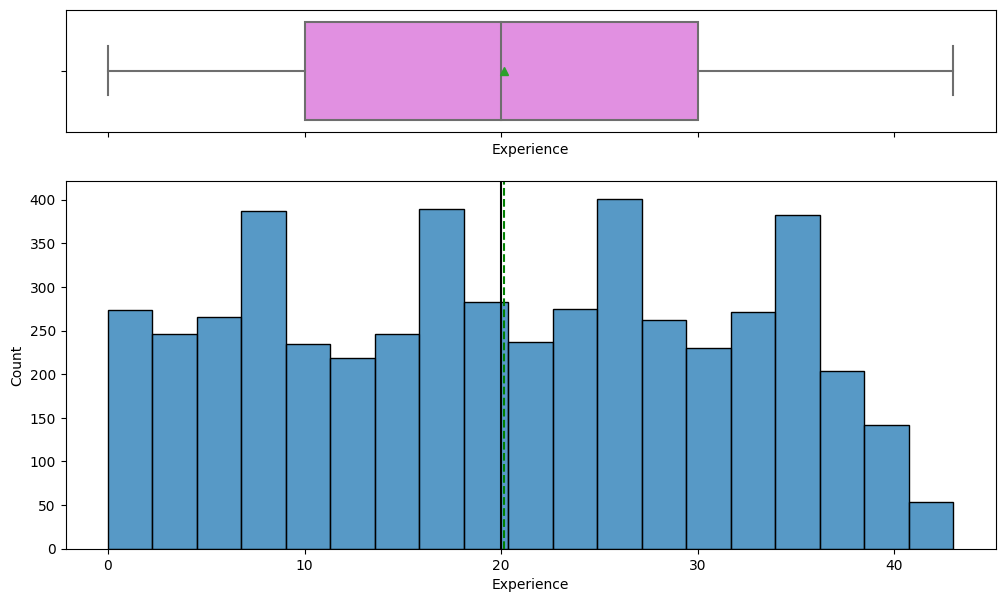

In [205]:
histogram_boxplot(Loan, "Experience")

Experience seems to have a uniform distribution.

3. Income

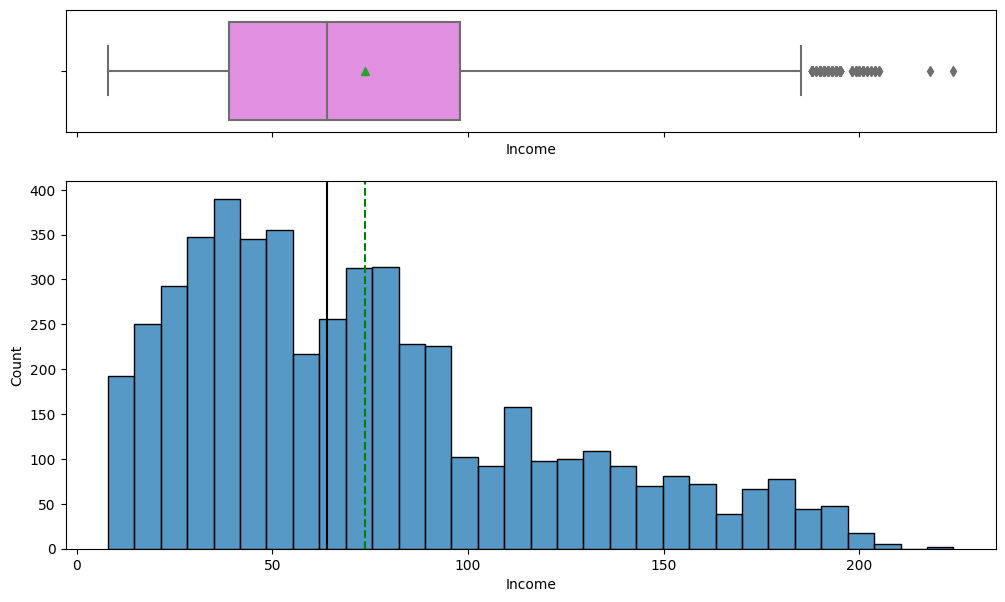

In [206]:
histogram_boxplot(Loan, "Income")

Income is right skewed, with a average of 73K.

4. CCAvg

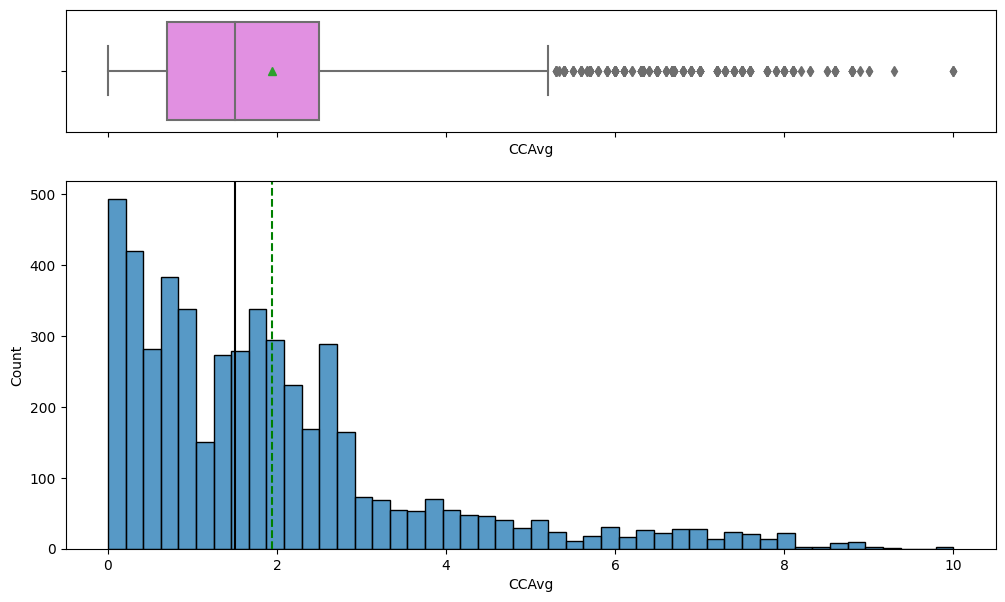

In [207]:
histogram_boxplot(Loan, "CCAvg")

CC average is right skewed, wit ha max of 10K and a average of 1.93K

5. Mortgage

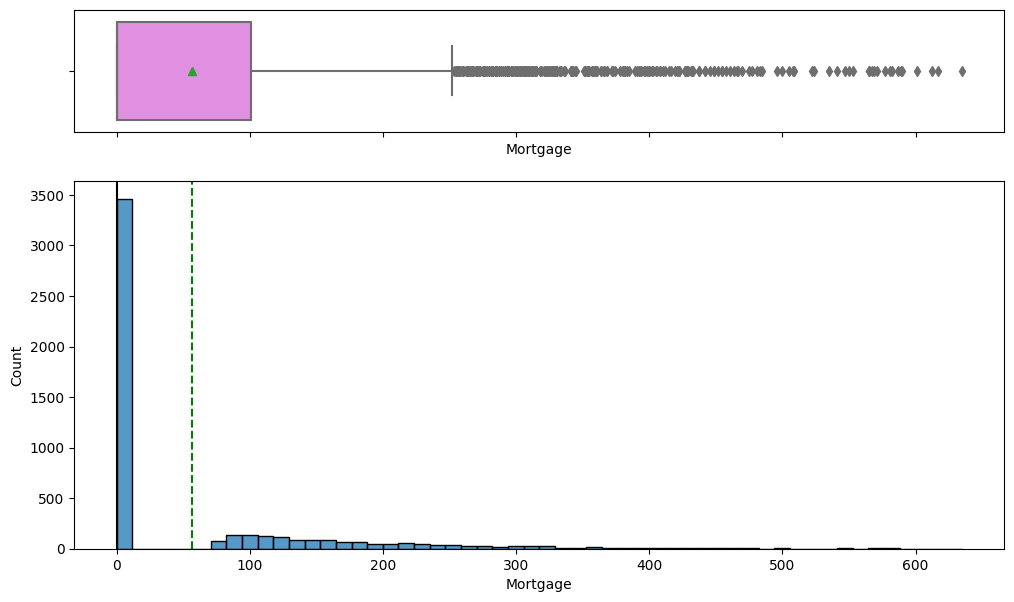

In [208]:
histogram_boxplot(Loan, "Mortgage")

More than 50% of the customers do not have a mortage and it is very right skewed.

6. Family

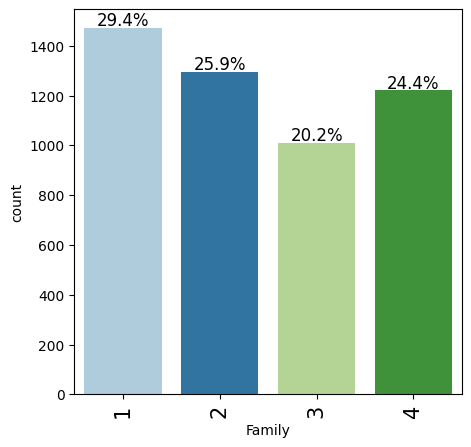

In [209]:
labeled_barplot(Loan, "Family", perc=True)

the number of family is well balanced, with 1 being a little bigger.

7. Education

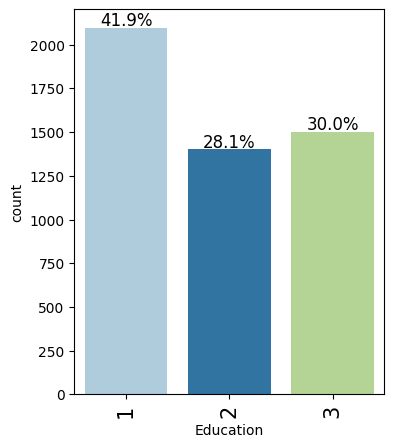

In [210]:
labeled_barplot(Loan, "Education", perc=True)

the bank has more undergraduate (41.9%) than Graduates and professionals/advanced.

8. Securities_Account

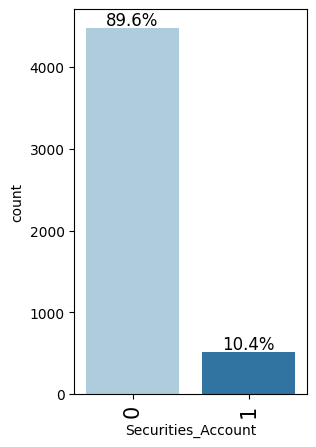

In [211]:
labeled_barplot(Loan, "Securities_Account", perc=True)

The bank has a small proportion of Securities Account (10.4%)

9. CD_Account

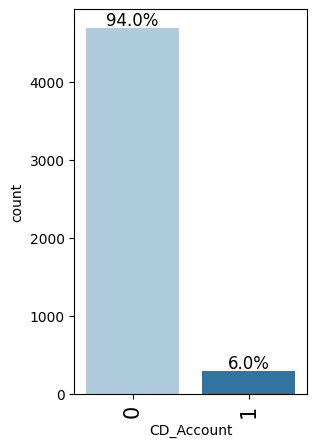

In [212]:
labeled_barplot(Loan, "CD_Account", perc=True)

The bank has a very small proportion of Credit deposit (6%)

10. Online

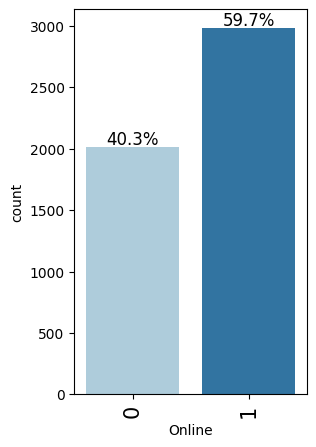

In [213]:
labeled_barplot(Loan, "Online", perc=True)

11. Credit Card

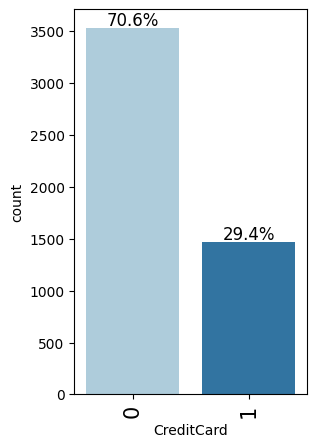

In [214]:
labeled_barplot(Loan, "CreditCard", perc=True)

12. Zip Code

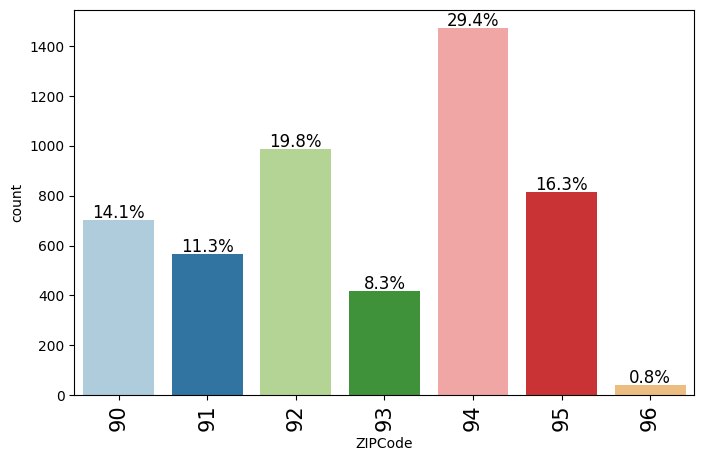

In [215]:
labeled_barplot(Loan, "ZIPCode", perc=True)

13. Personal Loan

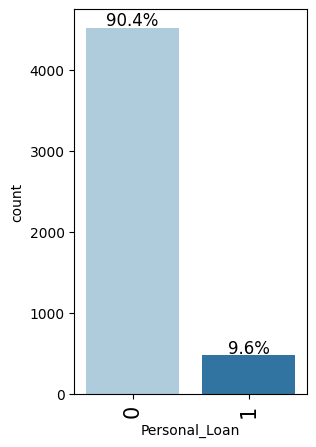

In [216]:
labeled_barplot(Loan, "Personal_Loan", perc=True)

as expected the bank has 9.6% of customers with personal loan.

### Bivariate Analysis

1. Personal Loan vs. education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


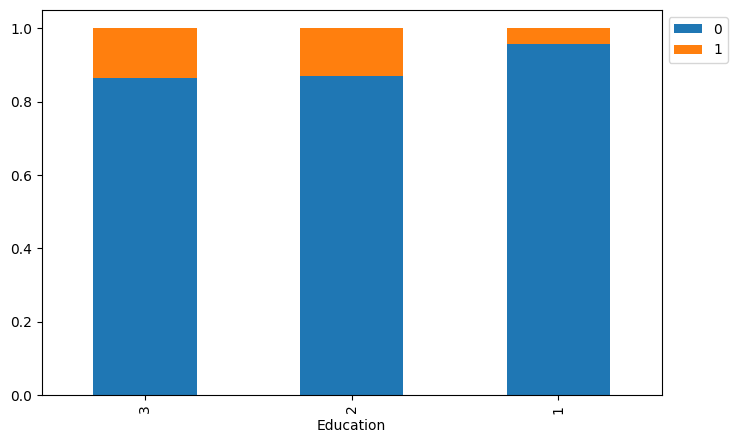

In [217]:
stacked_barplot(Loan, "Education", "Personal_Loan")

The **interest in purchasing a loan** increases with the **education level**. The undergraduate's customers have a low interest (only 93 customers of 2096-4%), but the advanced/professionals have a bigger interest(205 of 1501-13%).

2. Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


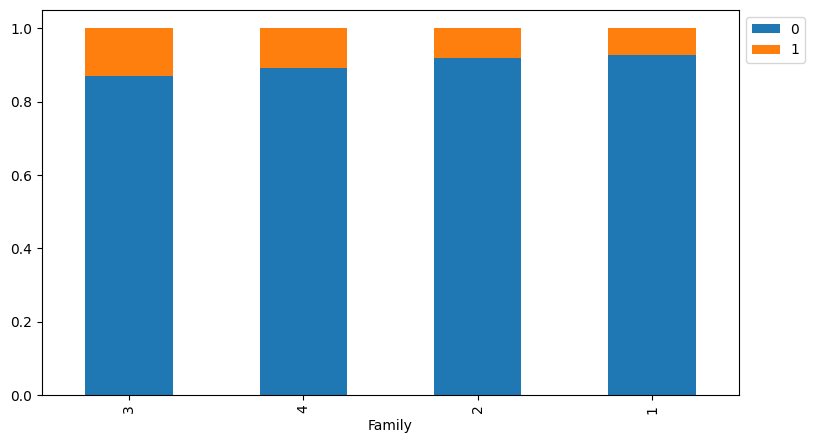

In [218]:
stacked_barplot(Loan, "Family", "Personal_Loan")

the interest had a slight increase over the increase in the number of family members

3. Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


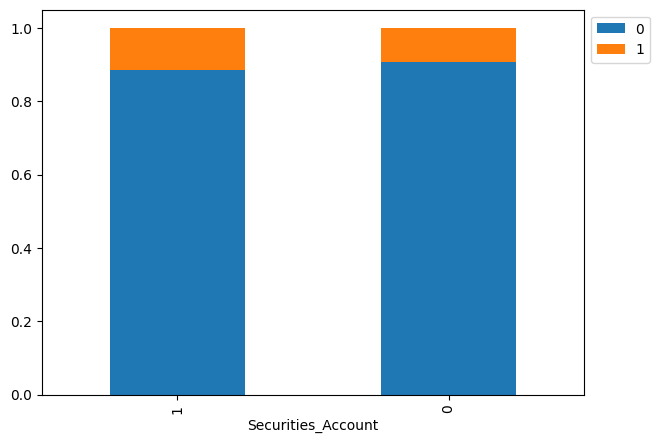

In [219]:
stacked_barplot(Loan, "Securities_Account", "Personal_Loan")

4. Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


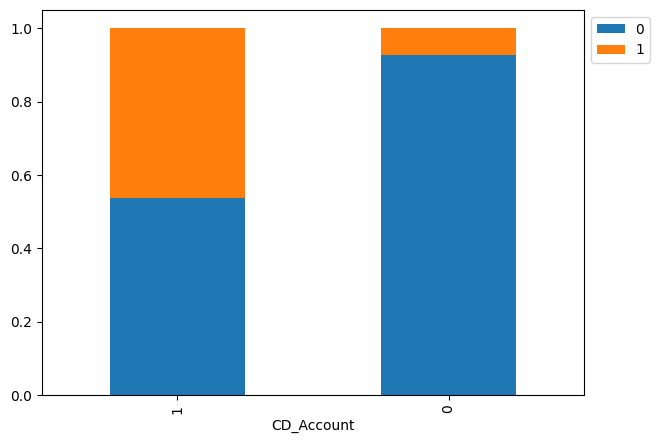

In [220]:
stacked_barplot(Loan, "CD_Account", "Personal_Loan")

there few customers with a credit deposit (302 over 5000 - 6%), but the interest in personal loan is  high (46% of customers with CD Account have a personal loan).

5. Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


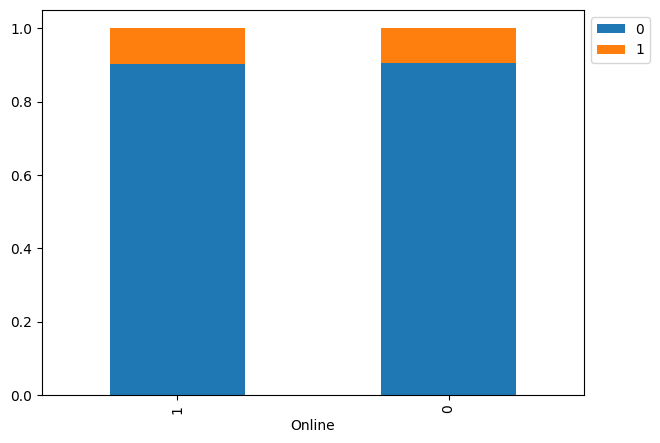

In [221]:
stacked_barplot(Loan, "Online", "Personal_Loan")

6. Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


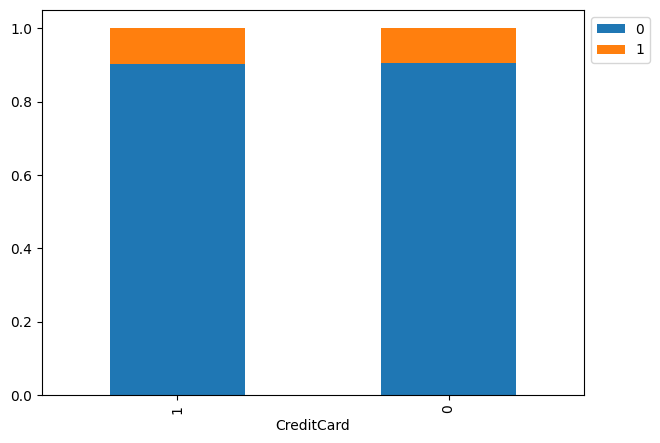

In [222]:
stacked_barplot(Loan, "CreditCard", "Personal_Loan")

7. Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


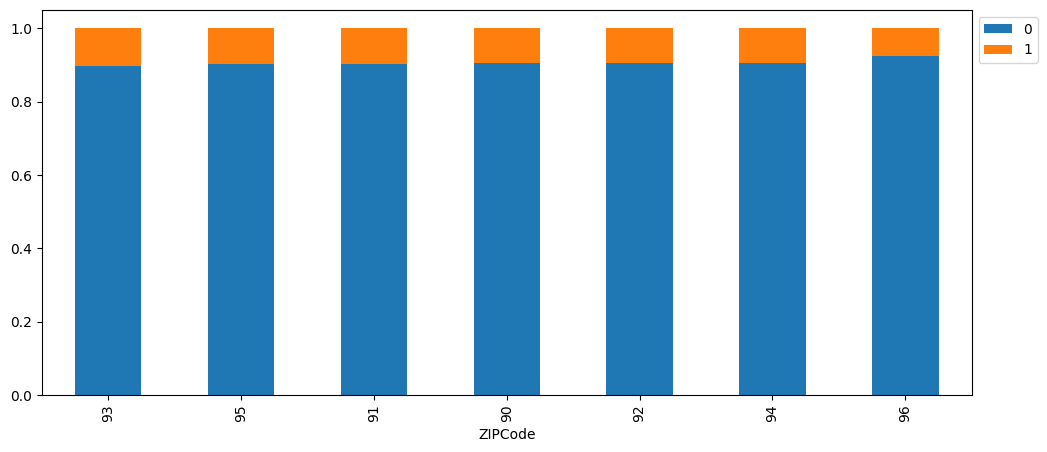

In [223]:
stacked_barplot(Loan, "ZIPCode", "Personal_Loan")

8. Personal Loan vs. Age

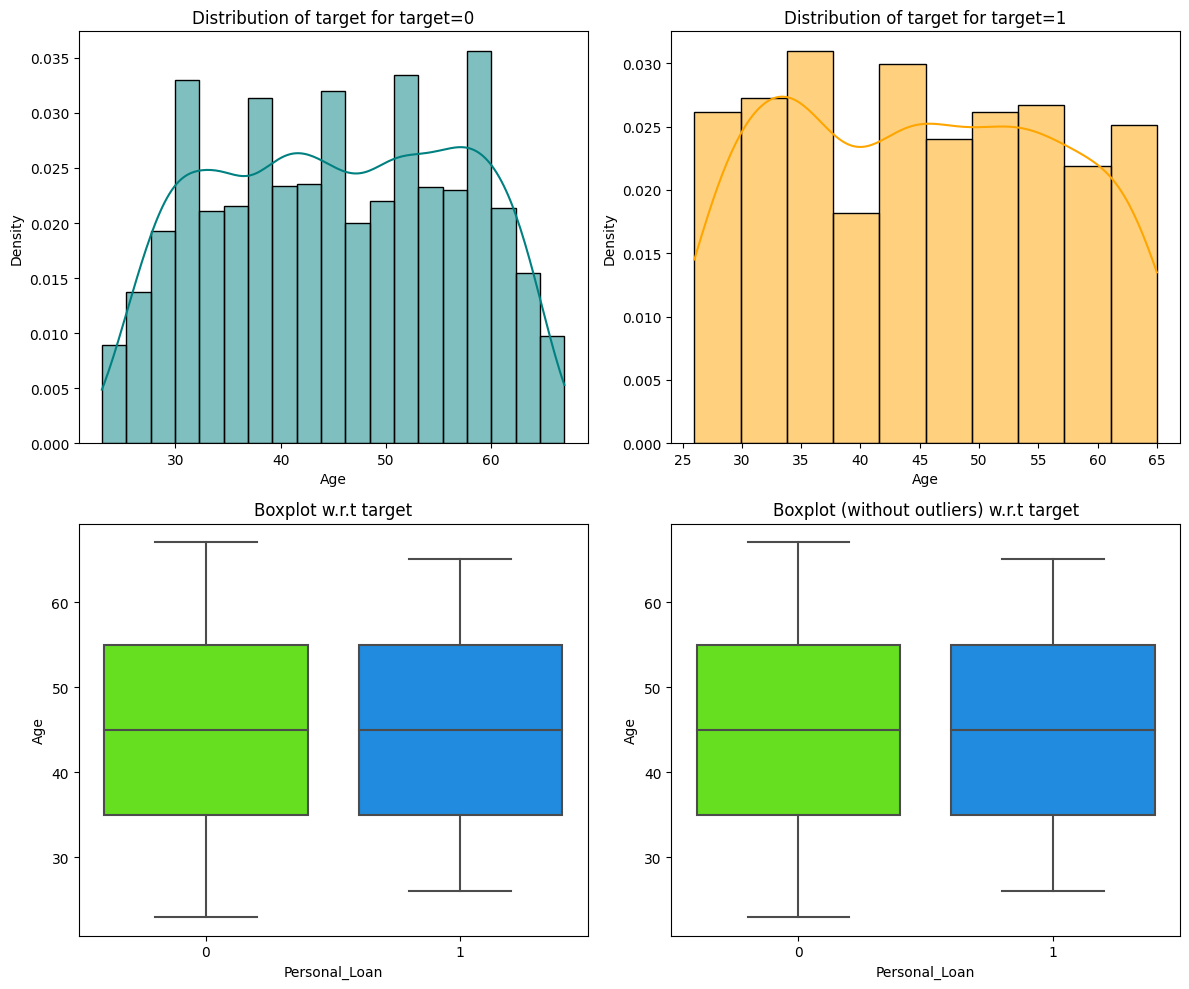

In [224]:
distribution_plot_wrt_target(Loan, "Age", "Personal_Loan")

9. Personal Loan vs Experience

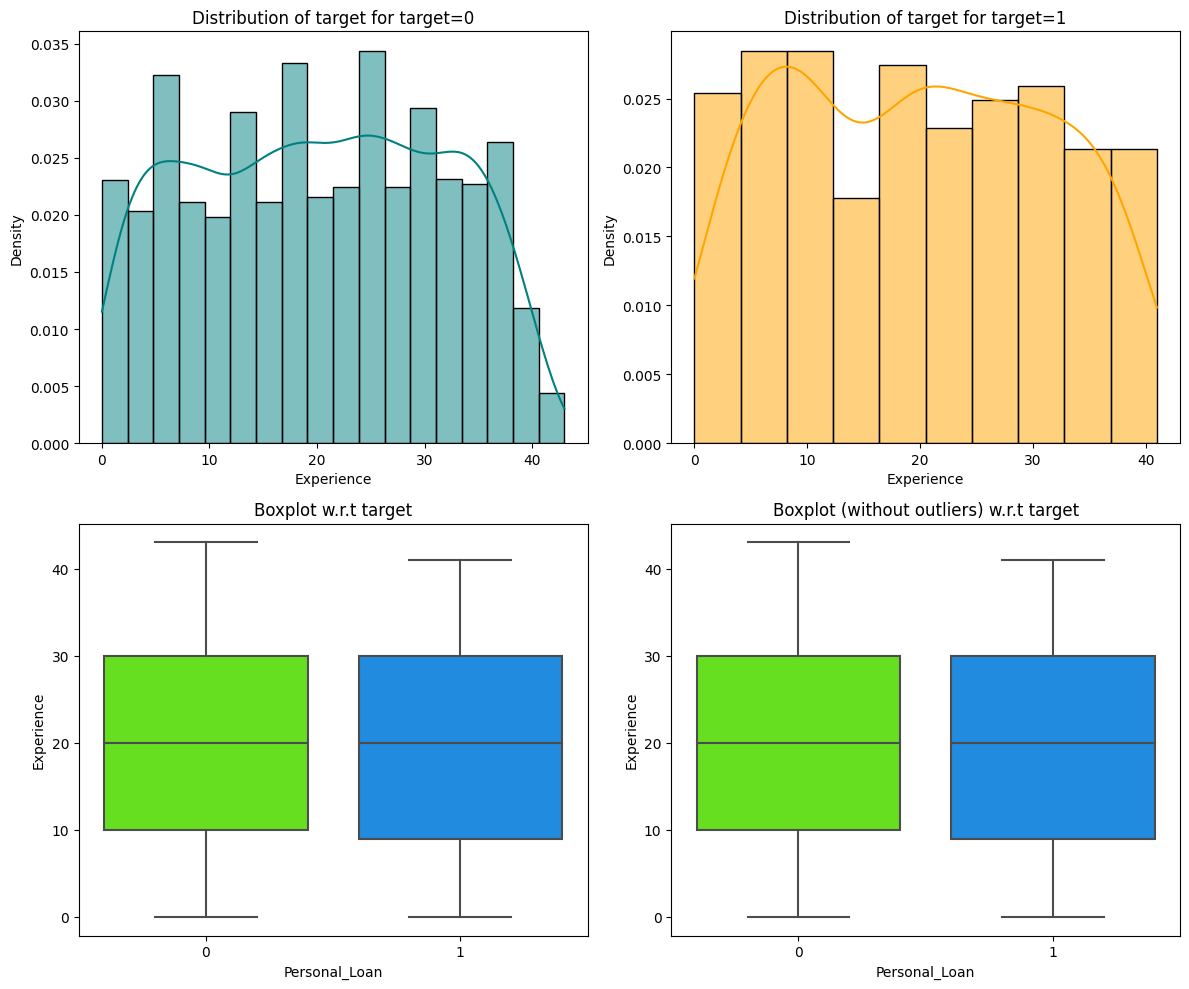

In [225]:
distribution_plot_wrt_target(Loan, "Experience", "Personal_Loan")

10. Personal Loan vs Income

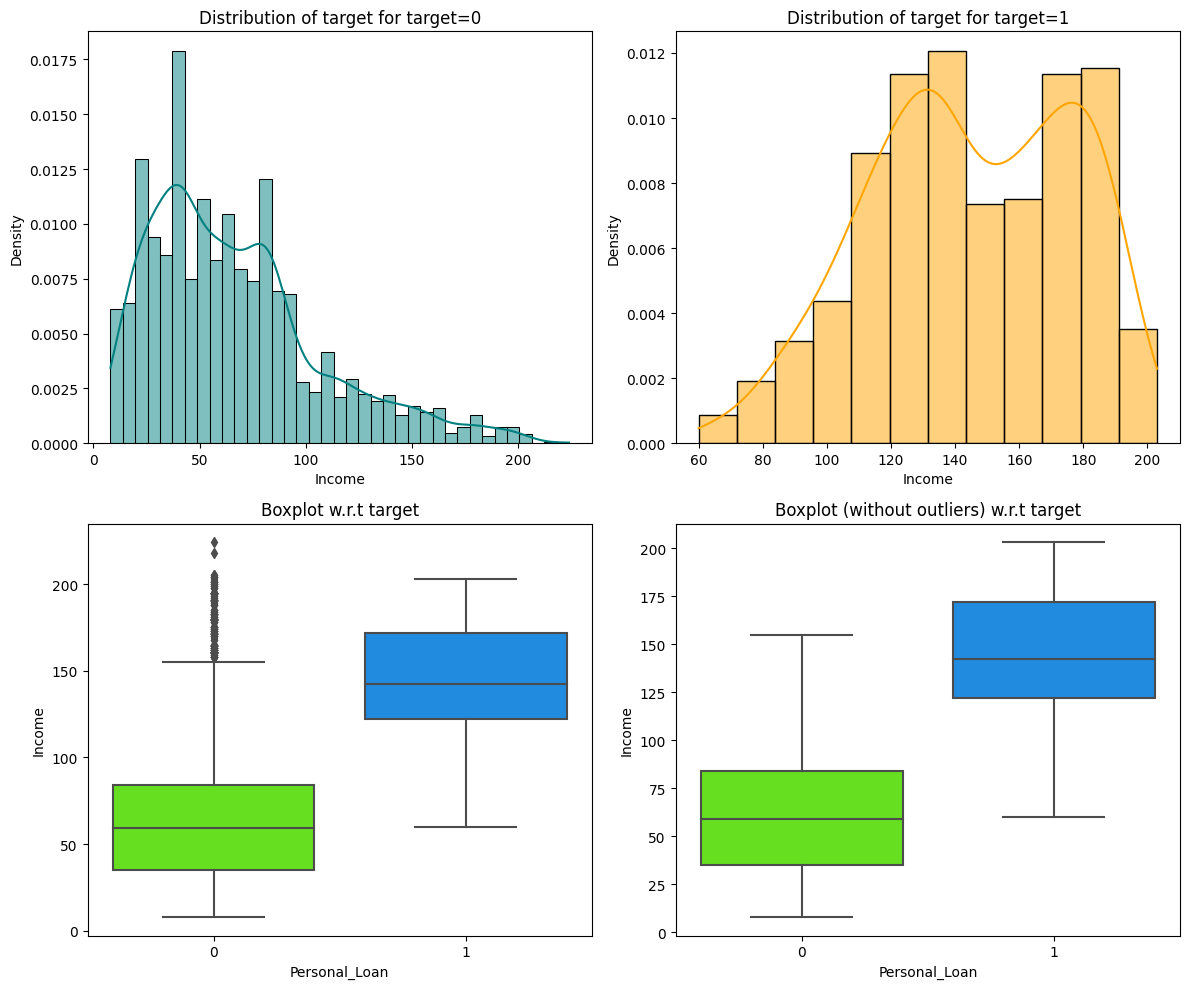

In [226]:
distribution_plot_wrt_target(Loan, "Income", "Personal_Loan")

- Customers with higher incomes have more interest in personal loan.

11. Personal Loan vs CCAvg

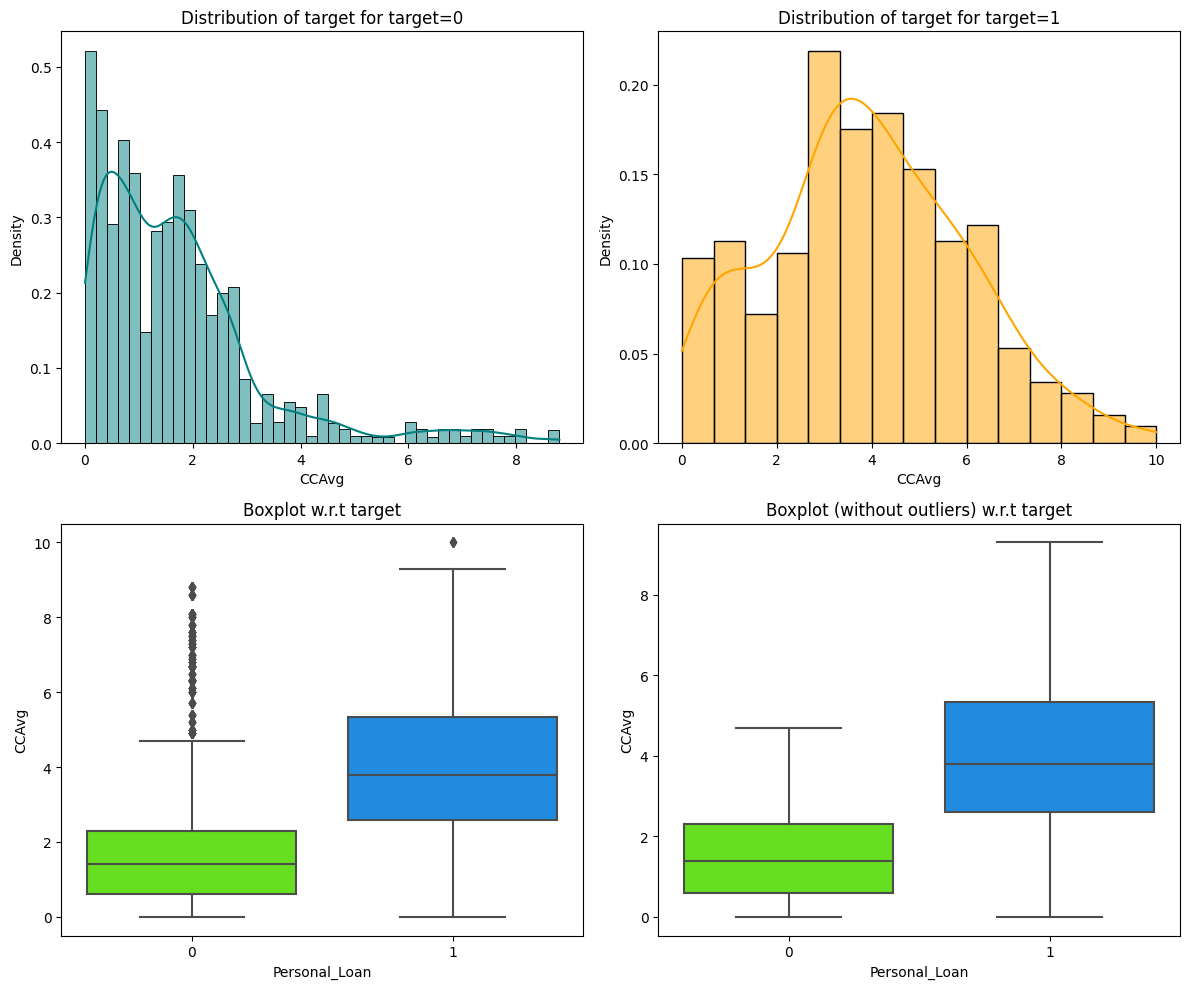

In [227]:
distribution_plot_wrt_target(Loan, "CCAvg", "Personal_Loan")

- Customers with higher Credit Card spent have more interest in personal loan.

12. Personal Loan vs. Mortgage

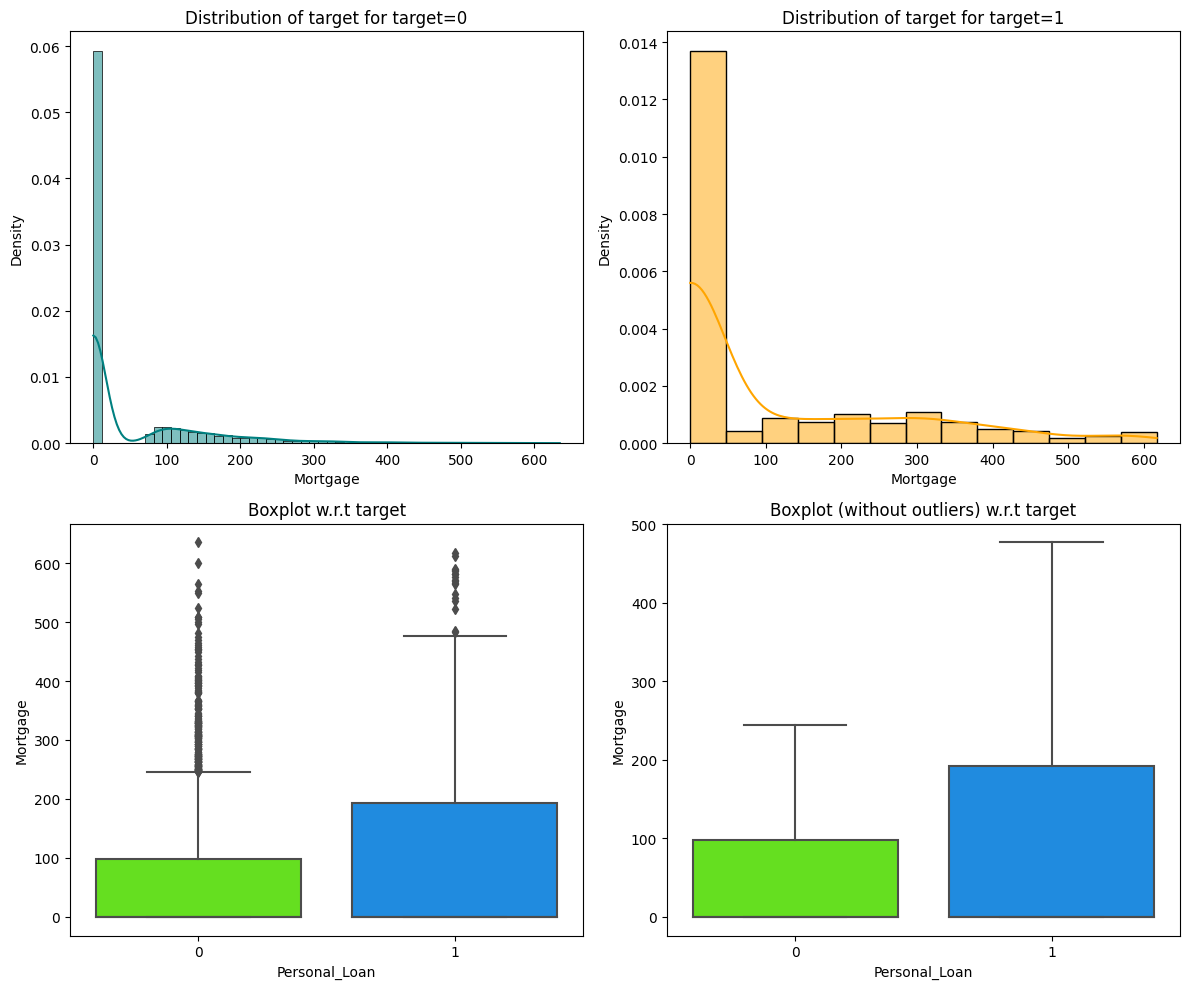

In [228]:
distribution_plot_wrt_target(Loan, "Mortgage", "Personal_Loan")

#### Correlation

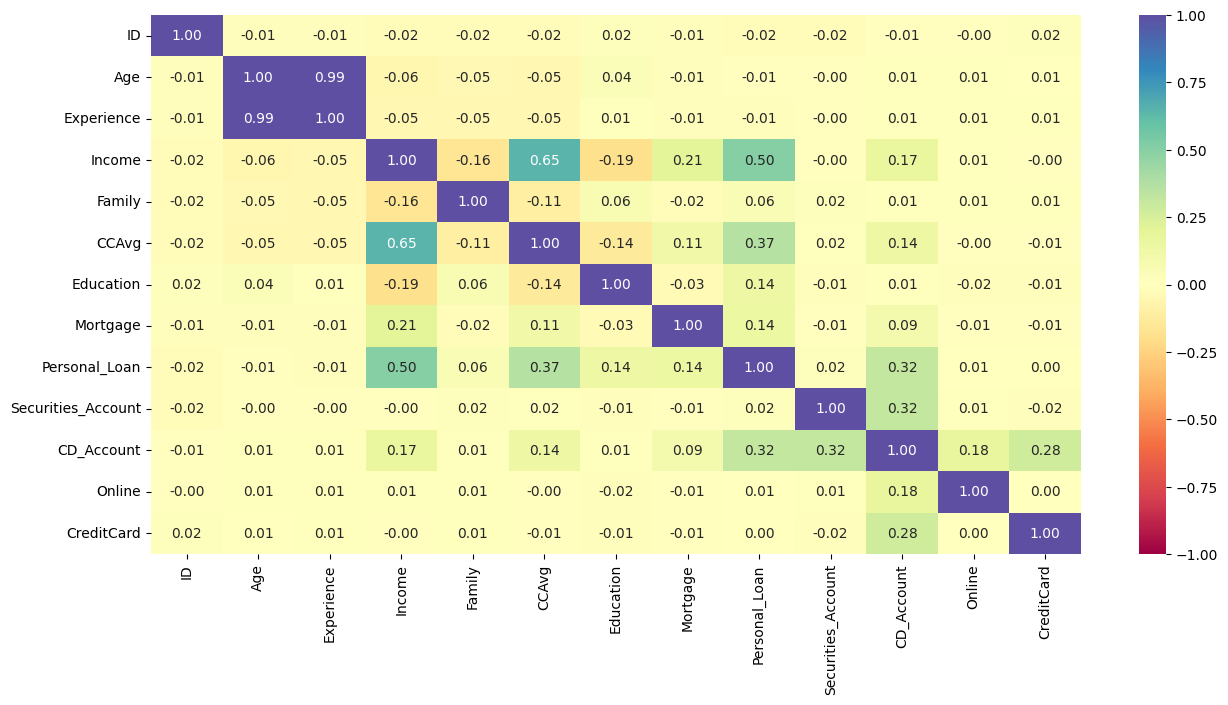

In [229]:
plt.figure(figsize=(15, 7))
sns.heatmap(Loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

**Observations:**
- **Mortgage:** At least 50% of customers do not have a mortgage, so it is very right skewed and with many outlier (the mean is 0 , but the max is 635K)
- **Credit Card:** There are 29.4% (1470 customers) with a credit card outside the bank.
- **Correlation:**  **Income**, **CD_Account** and **CC_Avg** have a strong correlation with **Personal Loan**
- There is no  **relationship** between **age** and the **interest in purchasing a loan**, so the age does not affect the interest in purchasing a loan.  
- The **interest in purchasing a loan** increases with the **education level**. The undergraduate's customers have a low interest (only 93 customers of 2096-4%), but the advanced/professionals have a bigger interest(205 of 1501-13%).

## Data Preprocessing (contd.)

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Missing Values:

In [230]:
Loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

The dataset do not have missing values.

#### Outlier detection

In [231]:
Q1 = Loan.quantile(0.25)
Q3 = Loan.quantile(0.75)

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [232]:
((Loan.select_dtypes(include=["float64", "int64"]) < lower)
    |(Loan.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(Loan) * 100

ID                     0.00
Age                    0.00
Experience             0.00
Income                 1.92
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

- Income have  1.92% of outliers.
- Personal Loan,Securities Account and CD_Account are categorical features, so the numbers are not outliers.

#### Feature engineering

In [233]:
 #mapping the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
Loan["Education"].replace(1, "Undergraduate", inplace=True)
Loan["Education"].replace(2, "Graduate", inplace=True)
Loan["Education"].replace(3, "Professional", inplace=True)

#### Data Preparation for modeling

In [234]:
X = Loan.drop(["Personal_Loan", "Experience","ID"], axis=1) #dropping the ID(key), the target and the experience(that has errors).
y = Loan["Personal_Loan"] #dependent variable

#### Dealing with categorical data

In [235]:
dummy_var=["ZIPCode","Education"]
X=pd.get_dummies(data = X, columns = dummy_var, drop_first = True)

In [238]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Income                   5000 non-null   int64  
 2   Family                   5000 non-null   int64  
 3   CCAvg                    5000 non-null   float64
 4   Mortgage                 5000 non-null   int64  
 5   Securities_Account       5000 non-null   int64  
 6   CD_Account               5000 non-null   int64  
 7   Online                   5000 non-null   int64  
 8   CreditCard               5000 non-null   int64  
 9   ZIPCode_91               5000 non-null   uint8  
 10  ZIPCode_92               5000 non-null   uint8  
 11  ZIPCode_93               5000 non-null   uint8  
 12  ZIPCode_94               5000 non-null   uint8  
 13  ZIPCode_95               5000 non-null   uint8  
 14  ZIPCode_96              

Dummy variables created and all variables are int or float.

#### Splitting the data between training and test data.  

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 37771)

In [240]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.907714
1    0.092286
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.895333
1    0.104667
Name: Personal_Loan, dtype: float64


The percentage of classes is very similar.

## Model Building

### Model Evaluation Criterion

#### Creating a function to evaluate the models


- The bank wants to invest in marketing to attract potential customers interested in personal loans, so it wants to reduce the number of **false negatives** in campaigns and to increase the **recall** measure.

In [241]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [242]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    print(model_performance_classification_sklearn(model,predictors,target))
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

#### Model Creation

In [243]:
#Model Create
#dt = DecisionTreeClassifier(class_weight = {0: 0.1, 1: 0.9}, random_state =1) #,min_samples_leaf=30)
dt = DecisionTreeClassifier( random_state =1) #,min_samples_leaf=30)
#Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model Evaluation

- Train data

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


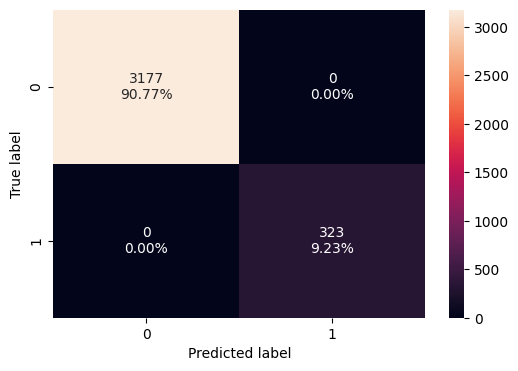

In [244]:
confusion_matrix_sklearn(dt, X_train, y_train)

Model has **100%** in the metrics (Recall, Precision,Accuracy and F1), which indicates a high match in the training data and high risk of **overfitting**

- Test Data

   Accuracy    Recall  Precision        F1
0     0.982  0.904459   0.922078  0.913183


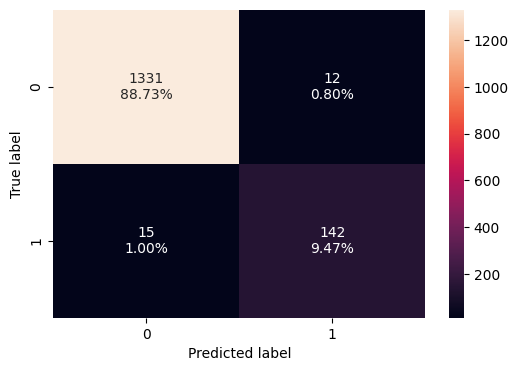

In [245]:
confusion_matrix_sklearn(dt, X_test, y_test)

There were  losses in all measures.


#### Plotting the Decison Tree

In [246]:
## creating a list of column names
feature_names = X_train.columns.to_list()

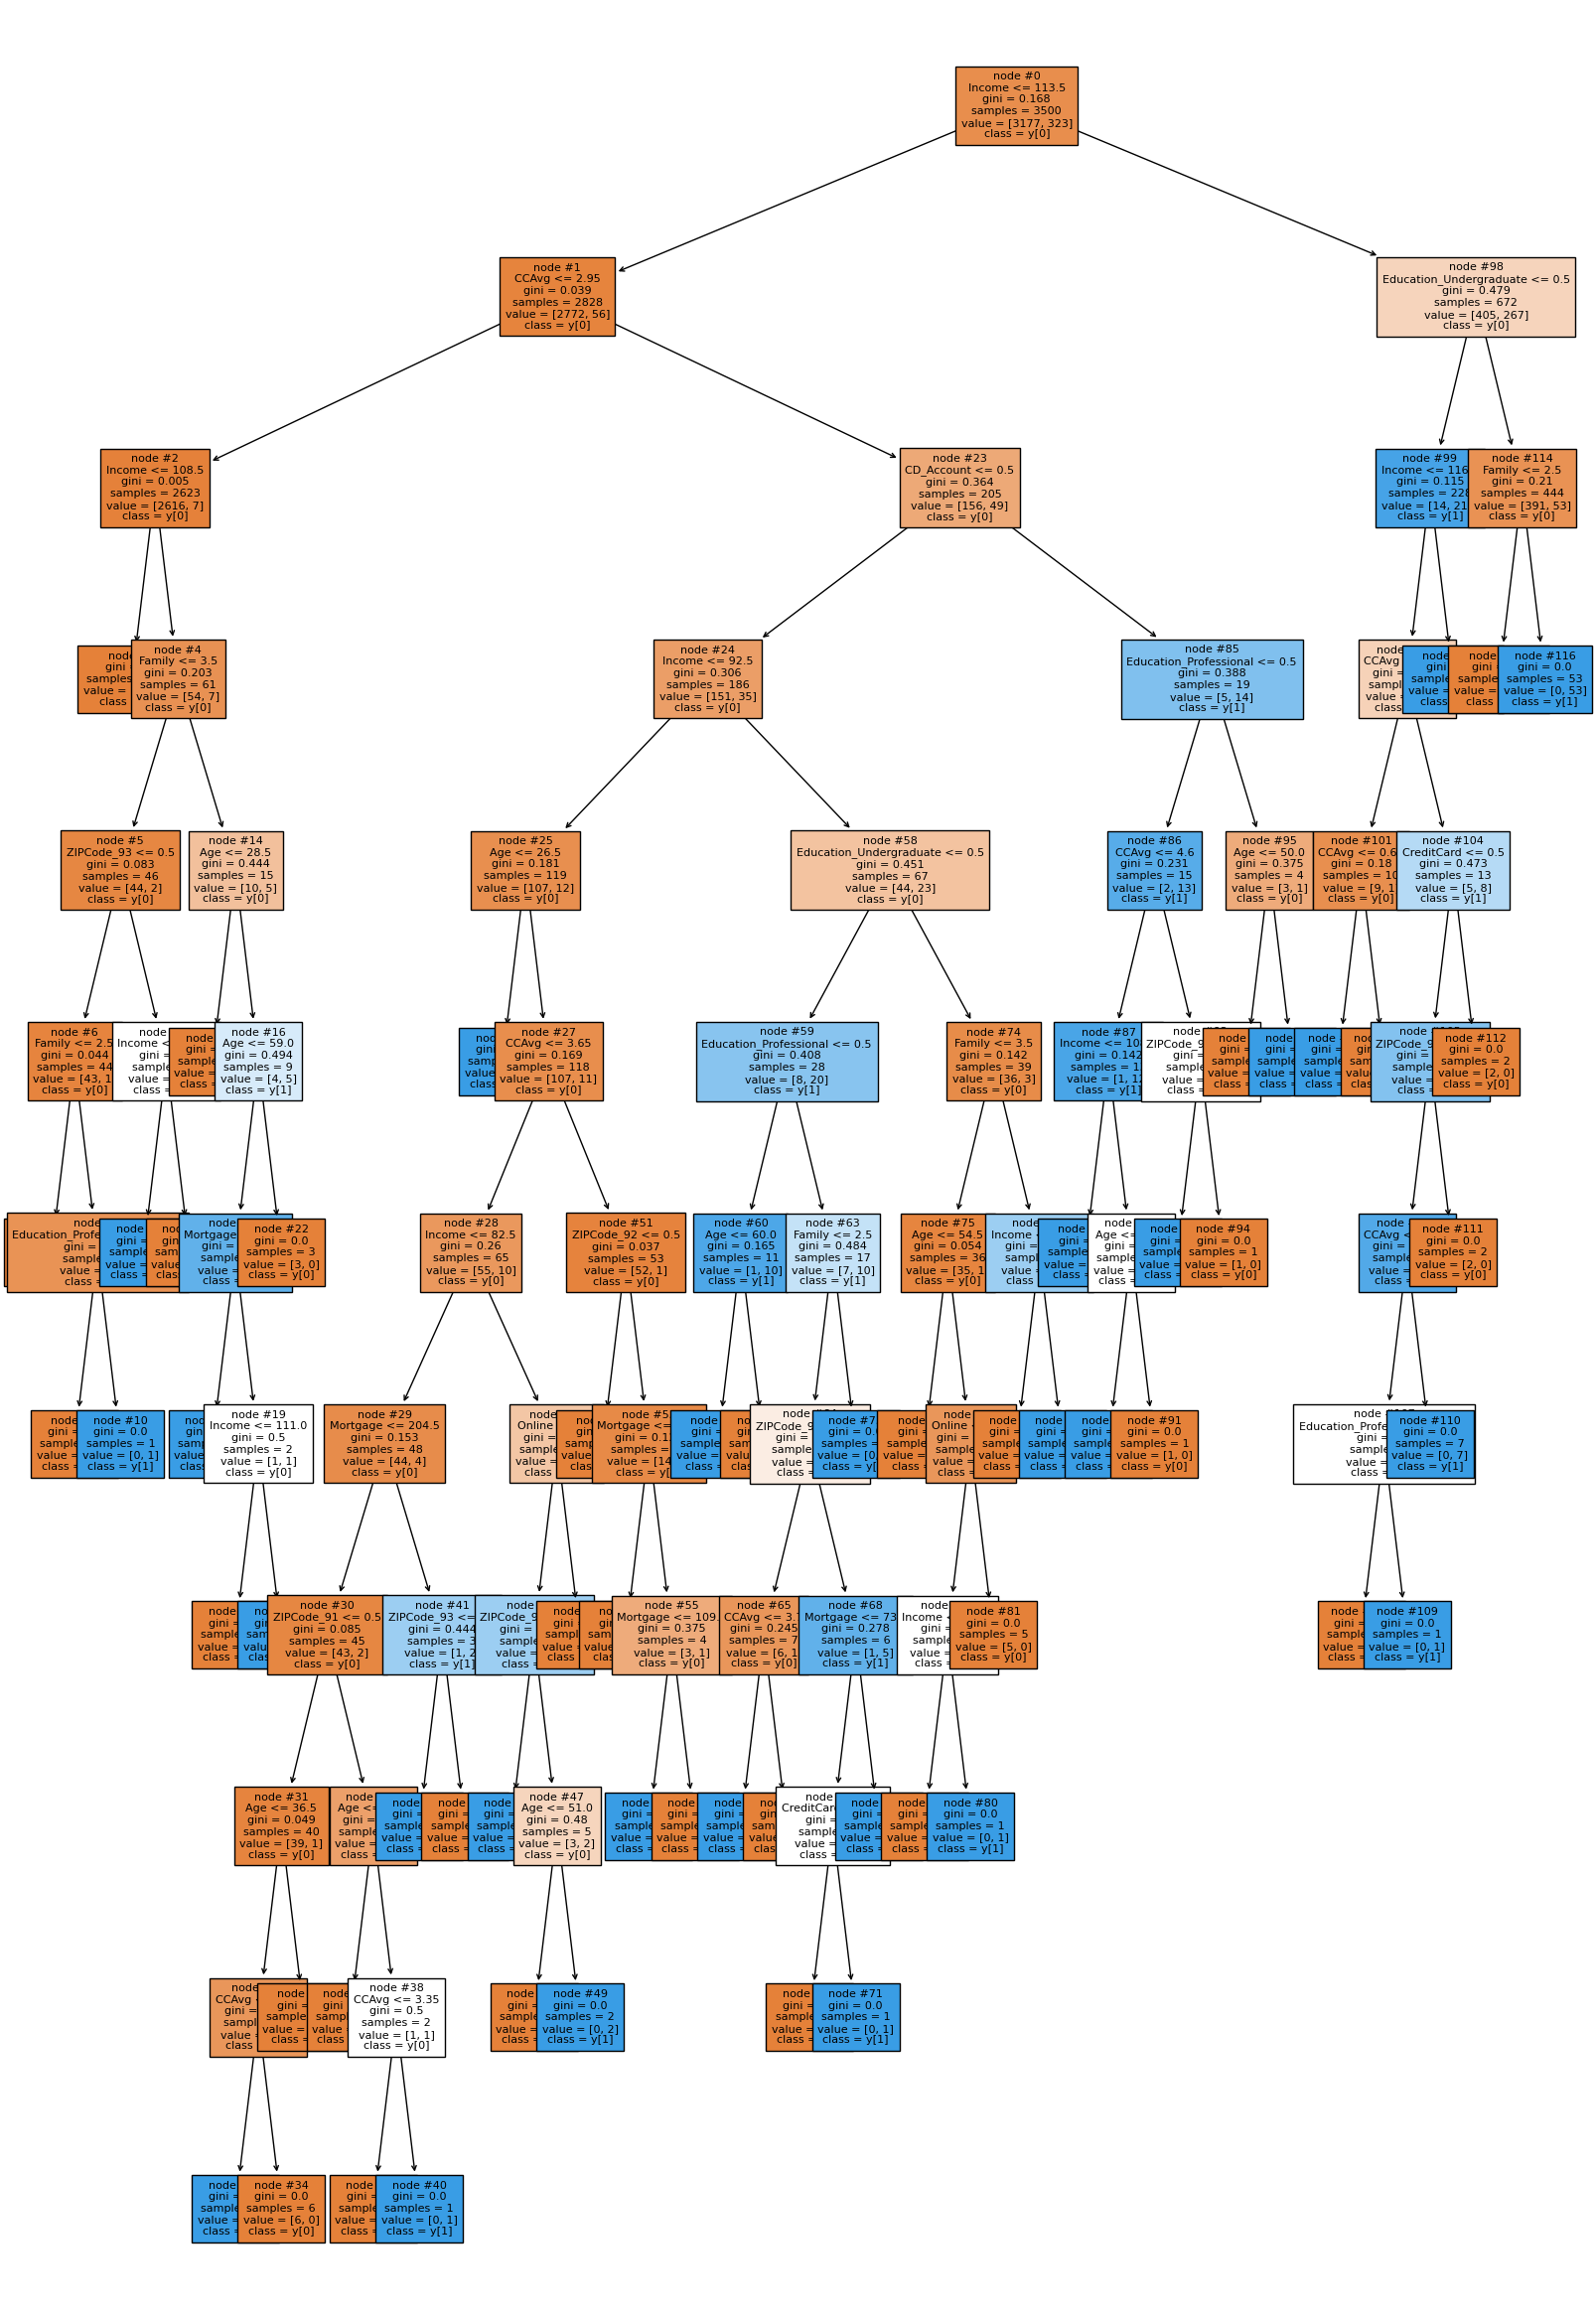

In [247]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dt,
    feature_names=feature_names,
    filled=True,
    fontsize=8,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- The tree is very complex. Let's see if its possible to reduce the overfiiting and the complexity.

### Model Performance Improvement

#### Pre-Pruning

In [248]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters to choose from

#parameters = {
#    "max_depth": [np.arange(2, 50, 5), None],
#    "criterion": ["entropy", "gini"]\,
#    "splitter": ["best", "random"],
#    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
#}
parameters = {
    "max_depth": np.arange(4, 12),
    "min_samples_leaf": [5,10,15,20,30],
    "max_leaf_nodes": [2, 3, 5, 10],
    #"criterion": ["entropy", "gini"],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
best_param=grid_obj.best_params_
print("Best params:",best_param)
# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

Best params: {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

#### Checking the performance

- Train Data

   Accuracy    Recall  Precision        F1
0  0.988286  0.928793   0.943396  0.936037


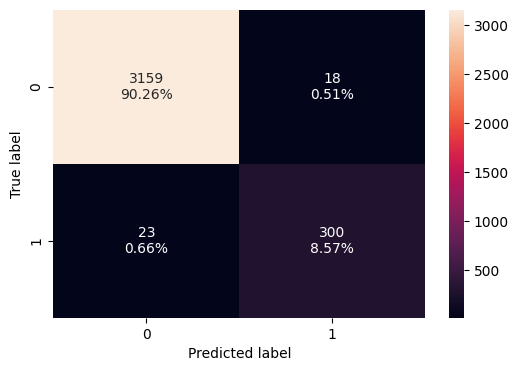

In [251]:
confusion_matrix_sklearn(estimator, X_train, y_train)

The recall measure is very good **92.8%**

Test data

   Accuracy    Recall  Precision        F1
0  0.985333  0.904459    0.95302  0.928105


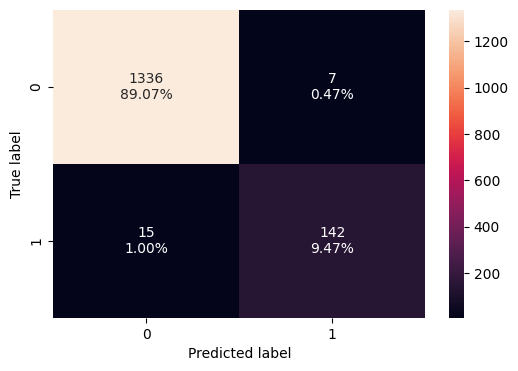

In [252]:
confusion_matrix_sklearn(estimator, X_test, y_test)

- After hyperparameter tuning the performance still very good in test set (90% of recall),also  the train and test recall measures are very close (so there is no overfitting) and the tree is less Complex.

#### Visualizing the Decision Tree:

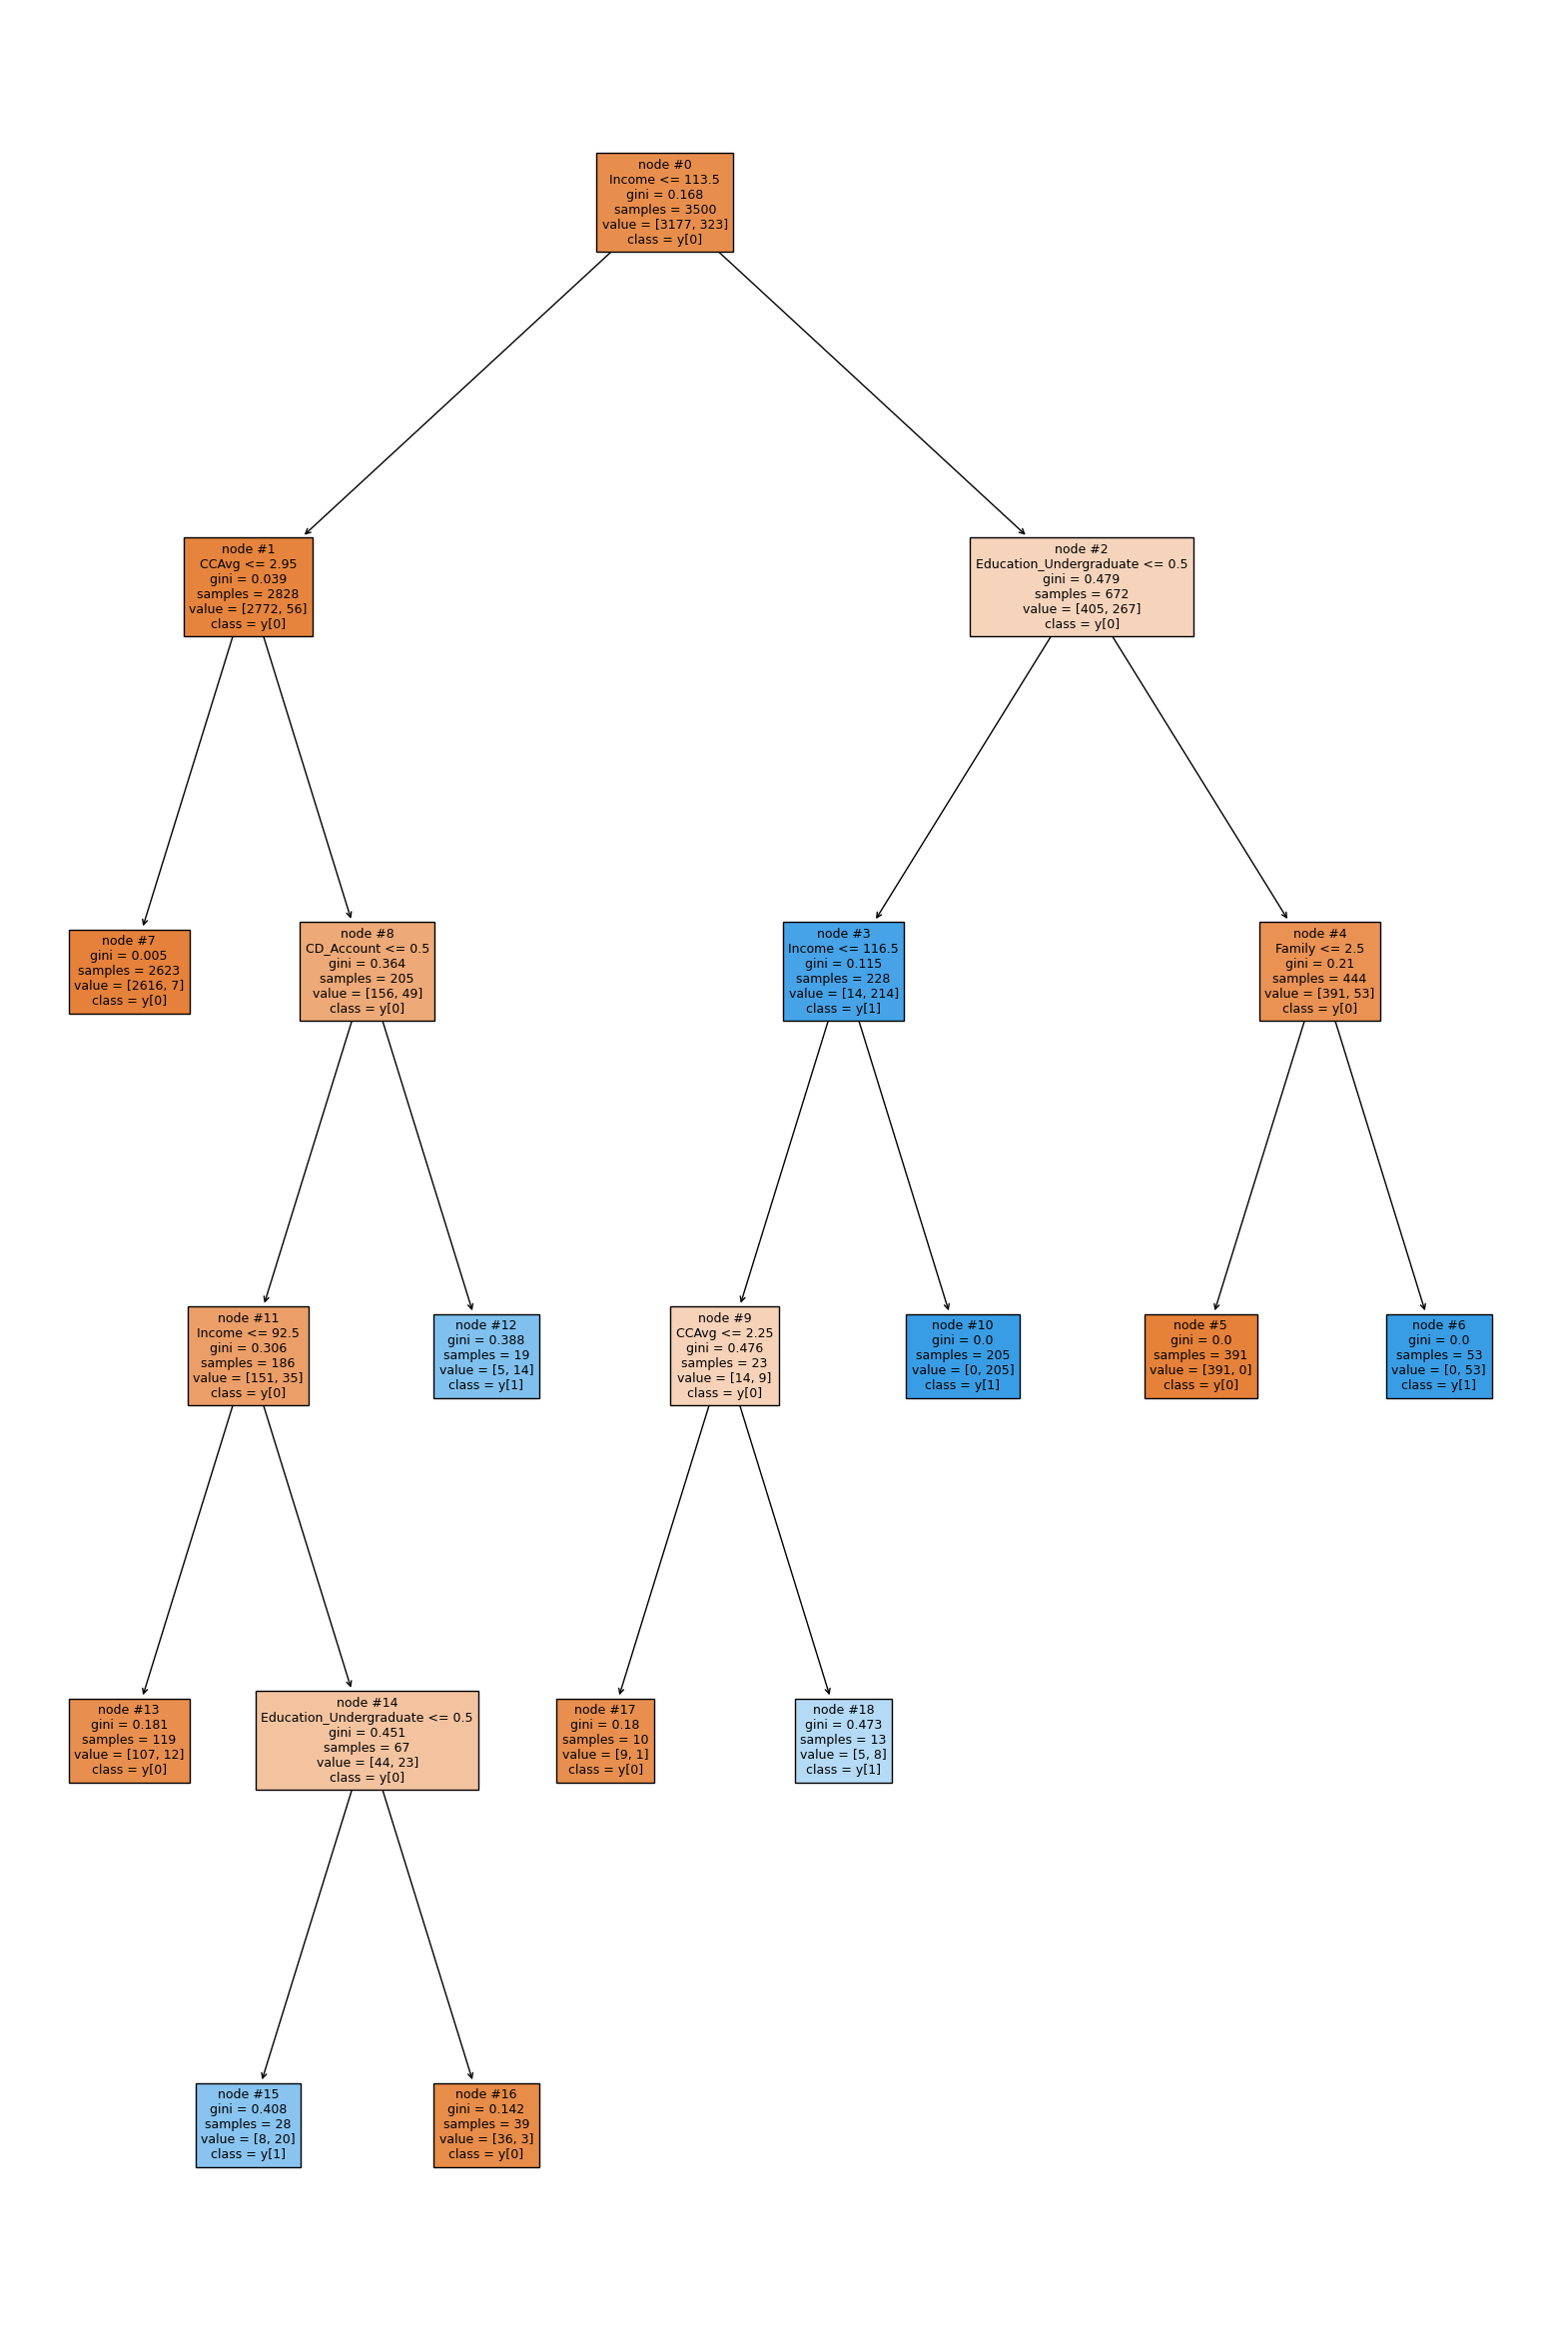

In [253]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [254]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2616.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [107.00, 12.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |--- weights: [8.00, 20.00] class: 1
|   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |--- weights: [36.00, 3.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [5.00, 14.00] class: 1
|--- Income >  113.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.25
|   |   |   |   |--- weights: [9.00, 1.00] class: 0
|   |   |   |--- CCAvg >  2.25
|   |   |   |   |--- weights: [5.00, 8.00] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 205.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weight

#### Features Importance

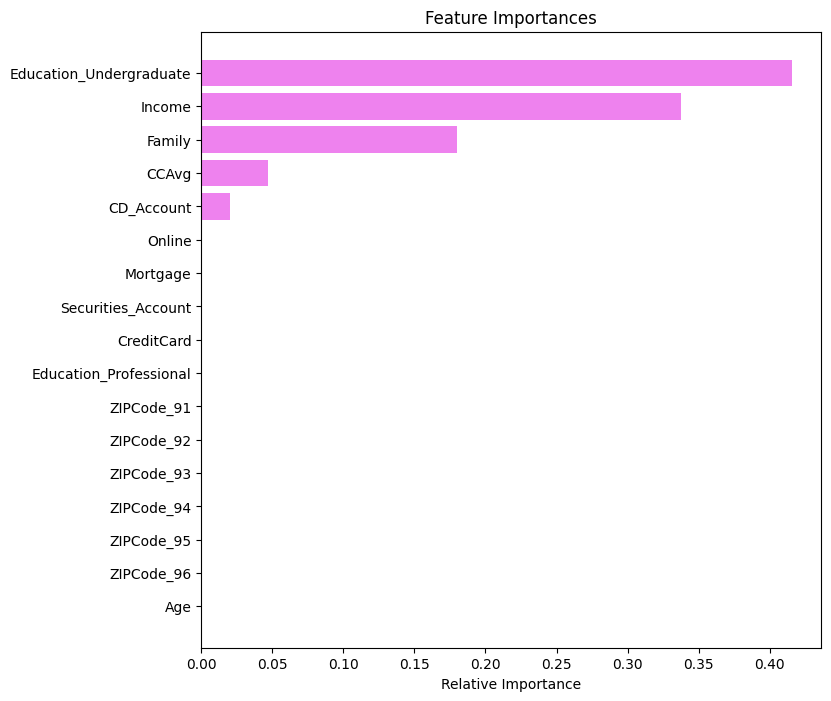

In [255]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features are:
1. Education
2. Income
3. Family
4. Credit Card Avg
5. Credit Deposit Account  

#### Pos-Pruning

#### Cost Complexity Pruning

In [256]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [257]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000185,0.000556
2,0.000187,0.001116
3,0.000218,0.002208
4,0.000238,0.002684
5,0.000238,0.003161
6,0.000248,0.004151
7,0.000254,0.004659
8,0.000273,0.005752
9,0.000381,0.006133


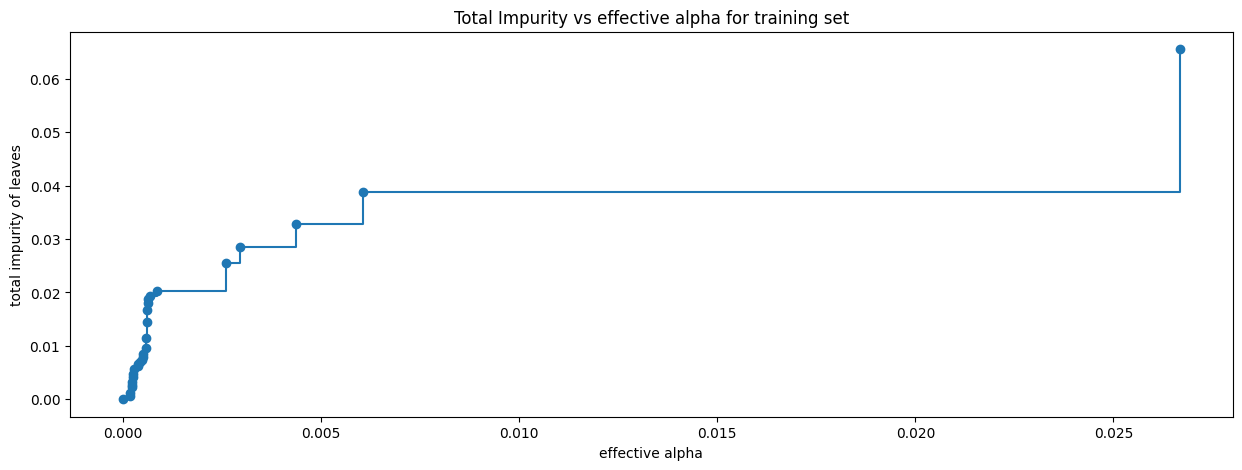

In [258]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [259]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.050996243107481985


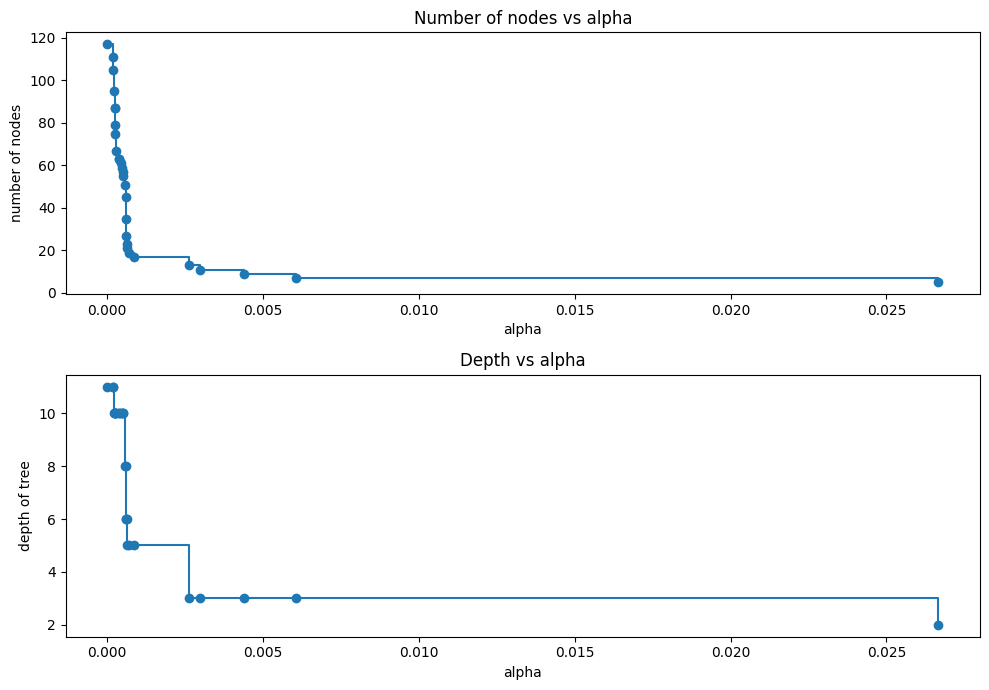

In [260]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [261]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [262]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

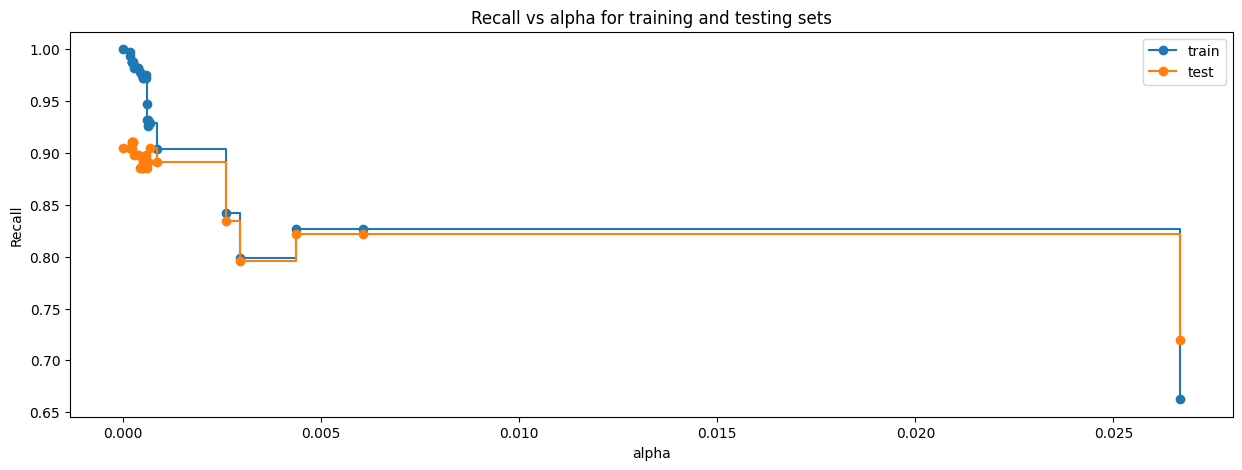

In [263]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The bests test recall are overfitting the model (recall for the training set near to 1)

In [264]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0002380952380952381, random_state=1)


In [265]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.998286,0.987616,0.993769,0.990683


   Accuracy    Recall  Precision        F1
0  0.998286  0.987616   0.993769  0.990683


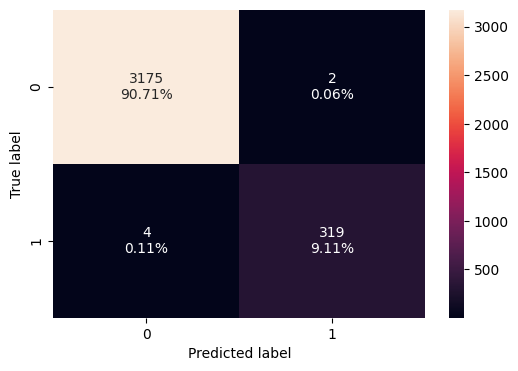

In [266]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [267]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.984,0.910828,0.934641,0.922581


   Accuracy    Recall  Precision        F1
0     0.984  0.910828   0.934641  0.922581


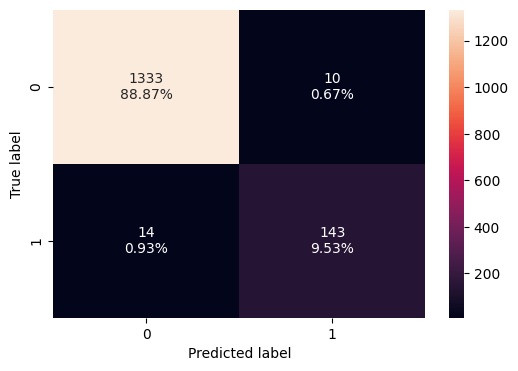

In [268]:
confusion_matrix_sklearn(best_model, X_test, y_test)

Plotting the Decison Tree

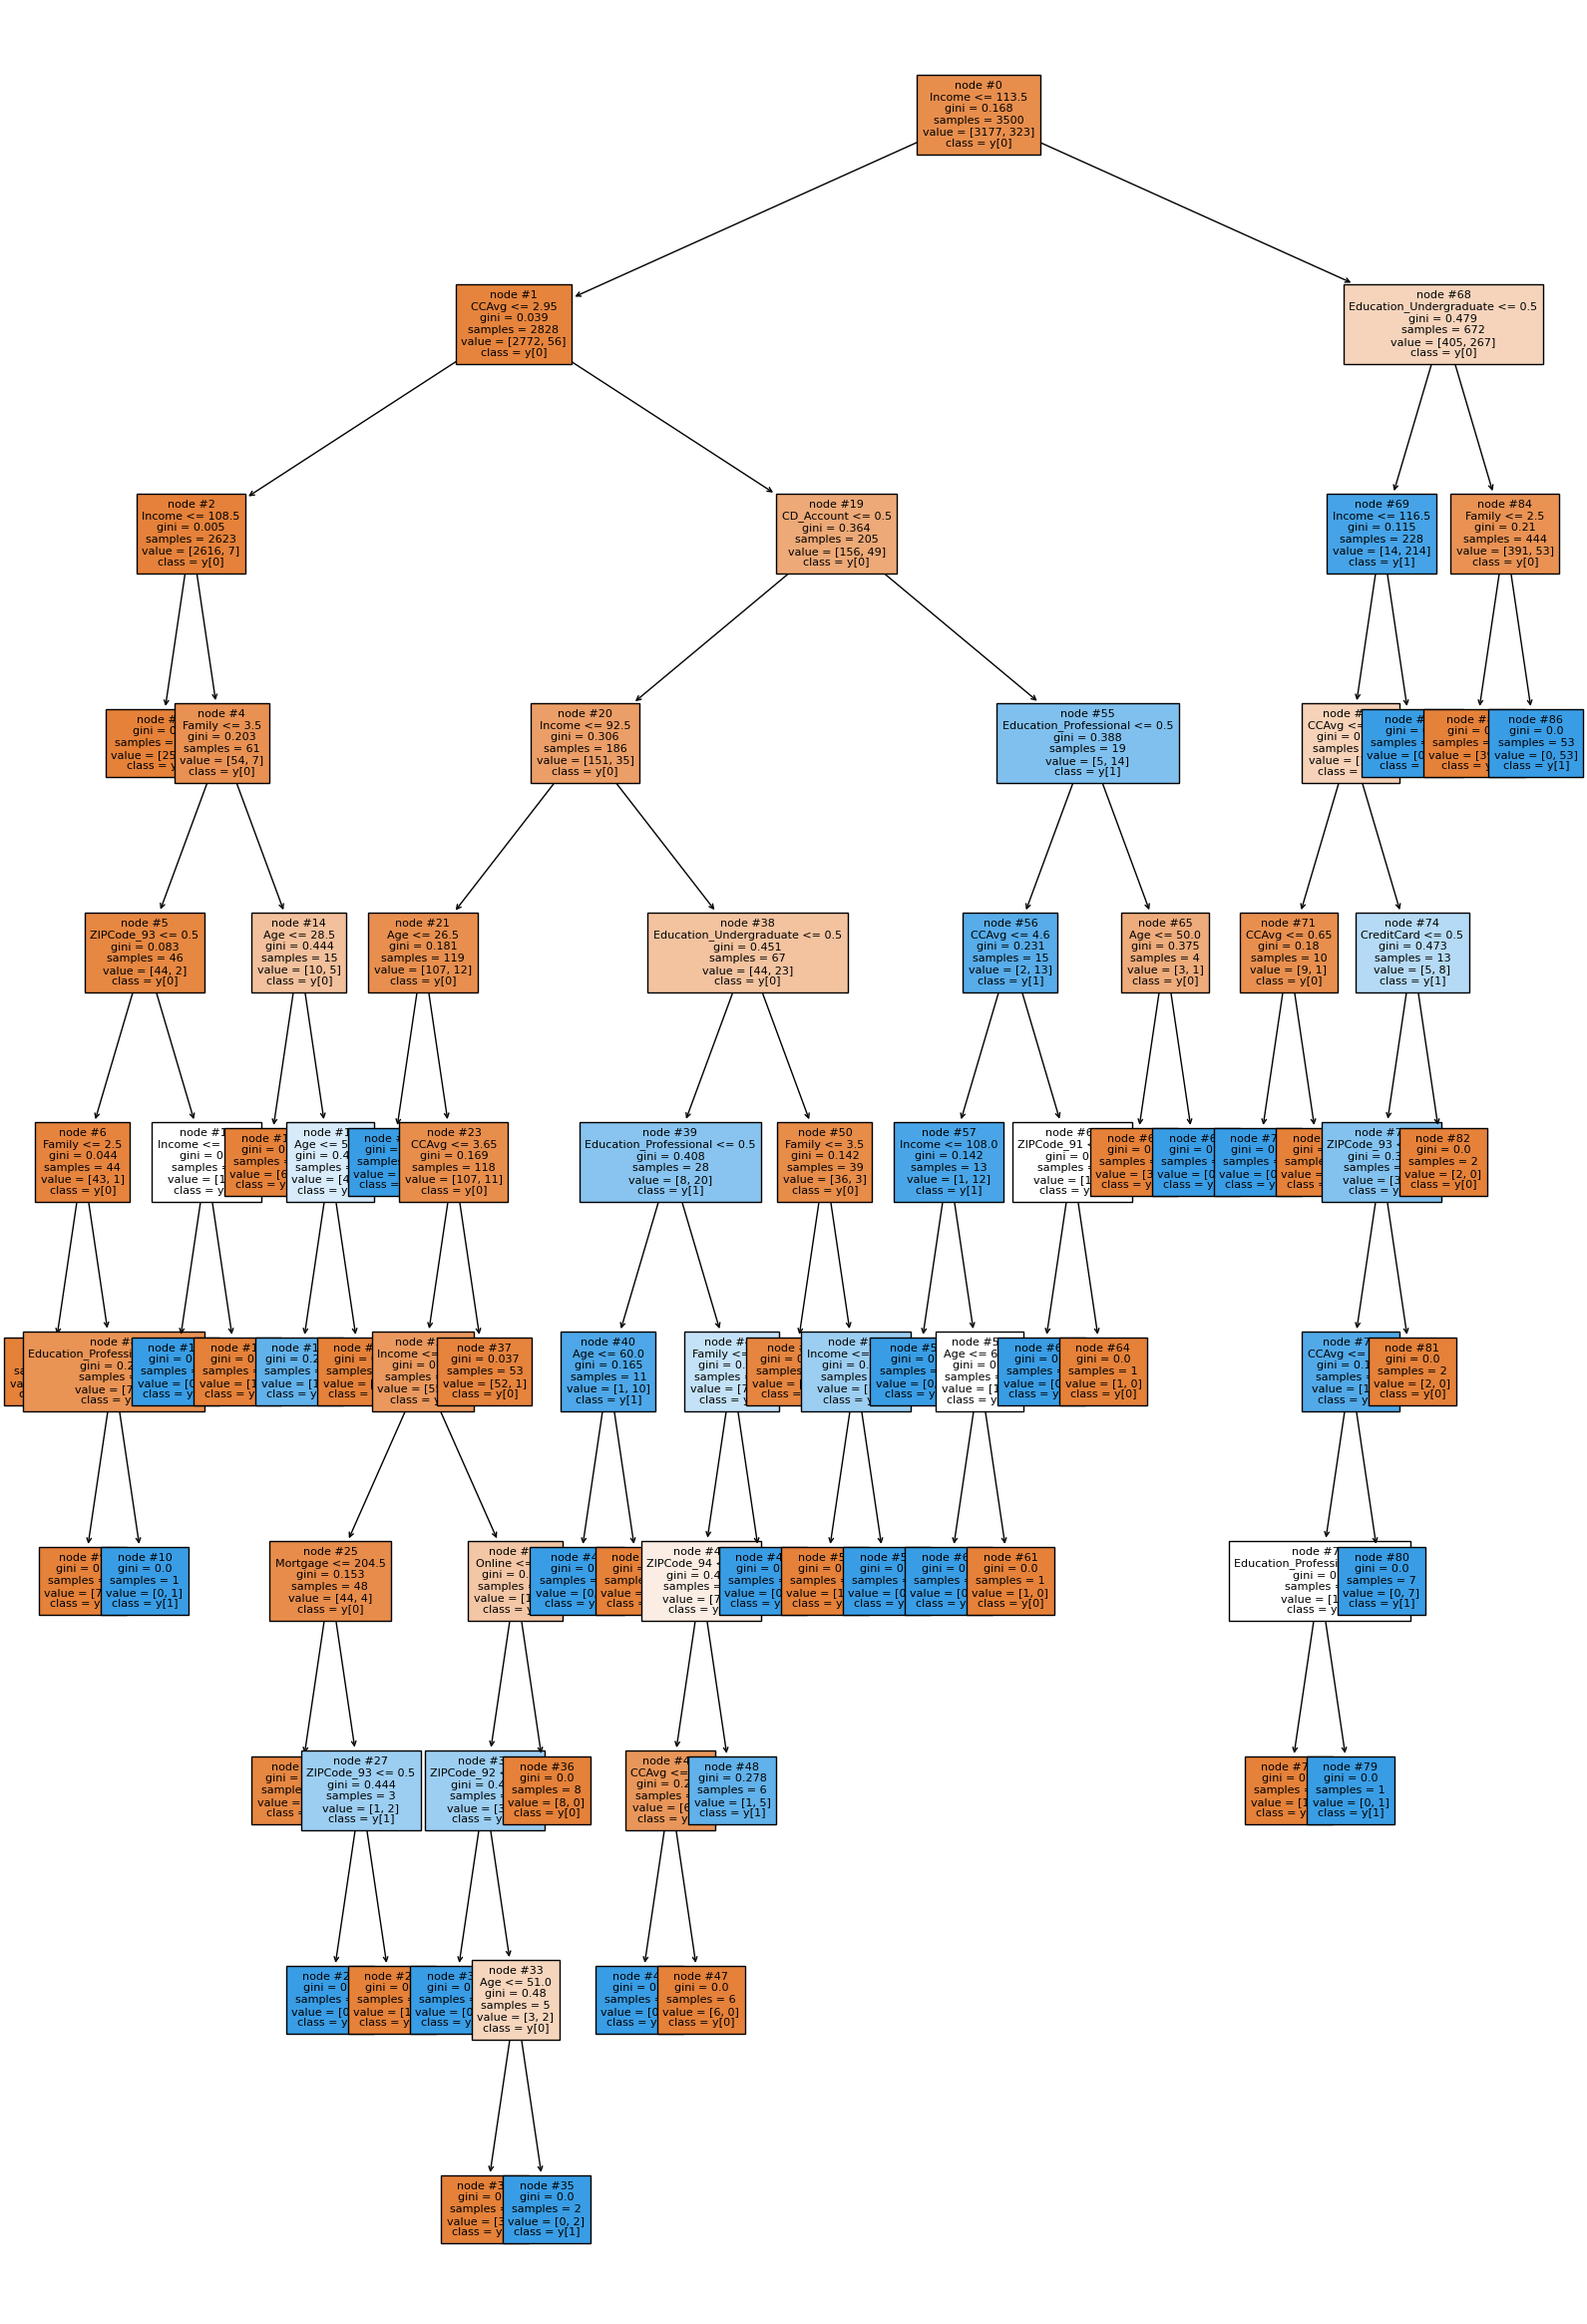

In [269]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=8,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

It is a very complex decision tree

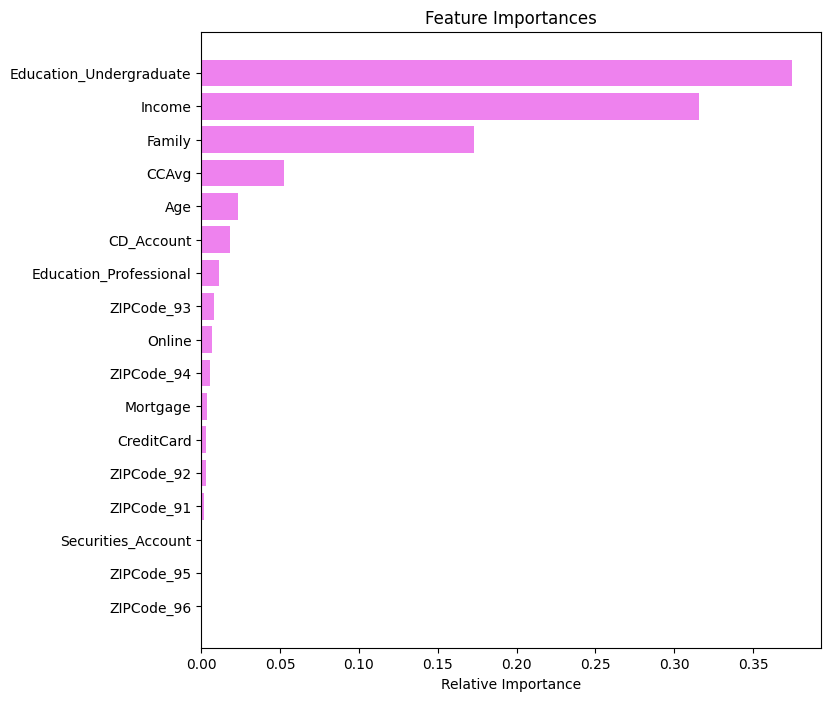

In [270]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [271]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dt, X_train, y_train
)
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_postpruned_perf_train=model_performance_classification_sklearn(
    best_model, X_train, y_train
)

# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.988286,0.998286
Recall,1.0,0.928793,0.987616
Precision,1.0,0.943396,0.993769
F1,1.0,0.936037,0.990683


In [272]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dt, X_test, y_test
)
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_postpruned_perf_test=model_performance_classification_sklearn(
    best_model, X_test, y_test
)

# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_train_comp_df


Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.982000,0.985333,0.984000
Recall,0.904459,0.904459,0.910828
Precision,0.922078,0.953020,0.934641
F1,0.913183,0.928105,0.922581


- The recall in the test set is very close into all 3 models.
- All 3 models have a **good**  **recall** measure performance in the test set.
- The **base model** and the **post-pruning** are **overfitting**.
- The **chosen model** is the **pre-pruning**, because it has a very good recall, does not have overfitting and is less complex than the others.   

## Actionable Insights and Business Recommendations


**Model Observations:**
- The dataset was analyzed  using  Decision Tree Classifier to build a predictive model and  was possible to obtain a very good model with ~**90%** of recall in the test set, meaaning that the bank will be able to reduce the false negatives and reach out ~90% of the customers interested in a personal loan.<br>

**Features most significant in driving personal loan purchases:**
- **Education**: The marketing should focus on **Graduates** and **professionals/advaced education** to increase the interest in personal loan.
- **Annual income** should be greather than **93K**.
- **Credit Card monthly expenses** greater than **2.2K**, so the bank should make campaigns to increase credit card utilization.
- The bank should also **incentivates** the **credit deposit** because it will also increases the **interest in personal loan**.
- **Number of family menbers** greather than **2**




